## CNN-Convolution Neural Network

When we enter into the world of computer vision we have to understand how a computer understands an image. A colored image has three channels and a 2D data in each channel. When the image size increases Machine learning start suffering from the curse of dimensionality, in order to overcome from this Deep learning comes up with a special type of Feedforward neural network known as CNN- Convolutional Neural Network.

In [2]:
# !pip install tensorflow
# !pip3 install six numpy wheel
# !pip3 install keras_applications==1.0.6 --no-deps
# !pip3 install keras_preprocessing==1.0.5 --no-deps
# !pip install --upgrade tensorflow

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

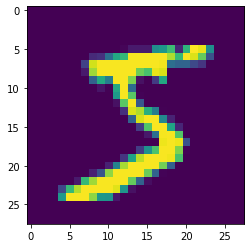

In [14]:
#  Load pre-shuffled MNIST data into train and test sets
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0])

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
print(X_train.shape)
print(X_train[1])
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
print(X_train[1])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

(60000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0

Now Create a model in Deep learning using Keras,

In [17]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Now Build and run the model.

In [18]:
#build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 7s - loss: 0.2818 - accuracy: 0.9193 - val_loss: 0.1469 - val_accuracy: 0.9567
Epoch 2/10
60000/60000 - 6s - loss: 0.1119 - accuracy: 0.9676 - val_loss: 0.0963 - val_accuracy: 0.9715
Epoch 3/10
60000/60000 - 6s - loss: 0.0700 - accuracy: 0.9796 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 4/10
60000/60000 - 7s - loss: 0.0503 - accuracy: 0.9856 - val_loss: 0.0689 - val_accuracy: 0.9765
Epoch 5/10
60000/60000 - 6s - loss: 0.0368 - accuracy: 0.9895 - val_loss: 0.0630 - val_accuracy: 0.9803
Epoch 6/10
60000/60000 - 6s - loss: 0.0271 - accuracy: 0.9927 - val_loss: 0.0679 - val_accuracy: 0.9800
Epoch 7/10
60000/60000 - 6s - loss: 0.0196 - accuracy: 0.9951 - val_loss: 0.0586 - val_accuracy: 0.9825
Epoch 8/10
60000/60000 - 6s - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.0613 - val_accuracy: 0.9816
Epoch 9/10
60000/60000 - 6s - loss: 0.0098 - accuracy: 0.9984 - val_loss: 0.0734 - val_accuracy: 0.9791
Epoch 10/10
60

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


# Conv1D
Import the libraries,

In [20]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb

Load Data,

In [21]:
#  Load pre-shuffled MNIST data into train and test sets
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
# set parameters:
max_features = 5000
maxlen = 784
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

In [23]:
num_pixels = X_train.shape[1] * X_train.shape[2]
#num_pixels 28*28=784

In [24]:
num_pixels = X_train.shape[1] * X_train.shape[2]
#num_pixels 28*28=784
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')
X_train.shape

(60000, 784)

In [25]:
X_train = X_train / 255
X_test = X_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] 
y_train.shape

(60000, 10)

In [26]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('Build model...')

x_train shape: (60000, 784)
x_test shape: (10000, 784)
Build model...


In [27]:
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(10))
model.add(Activation('softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 778s 13ms/sample - loss: 2.3017 - accuracy: 0.1127 - val_loss: 2.3003 - val_accuracy: 0.1167
Epoch 2/2
60000/60000 [==============================] - 738s 12ms/sample - loss: 2.2996 - accuracy: 0.1160 - val_loss: 2.2981 - val_accuracy: 0.1177


# Conv2D
Load Libraries,

In [29]:
#But this is not CNN its simple multi perceptron that are working as a CNN classifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [31]:
!pip install keras
from keras import backend as K
K.image_data_format()

Using TensorFlow backend.


'channels_last'

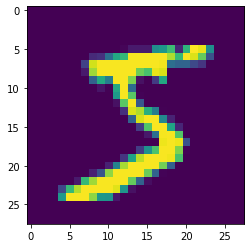

In [32]:
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
%matplotlib inline
plt.imshow(X_train[0])

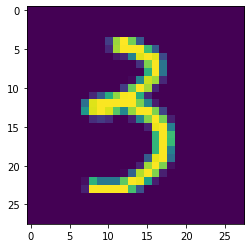

In [33]:
import numpy 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
plt.imshow(X_train[2232,0,:,:])

In [34]:
def baseline_model():
# create model
    model = Sequential()
    #model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(1,28,28), data_format='channels_first'))


    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.2943 - accuracy: 0.9193 - val_loss: 0.1111 - val_accuracy: 0.9686
Epoch 2/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0964 - accuracy: 0.9723 - val_loss: 0.0685 - val_accuracy: 0.9798
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0695 - accuracy: 0.9798 - val_loss: 0.0540 - val_accuracy: 0.9838
Epoch 4/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0491 - val_accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.0432 - val_accuracy: 0.9852
Epoch 6/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0440 - val_accuracy: 0.9851
Epoch 7/10
60000/60000 [==============================] 

In [38]:
scores = model.evaluate(X_test, y_test, verbose=2)
print(scores)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

10000/1 - 8s - loss: 0.0188 - accuracy: 0.9885
[0.037042615443922115, 0.9885]
CNN Error: 1.15%


Article : http://www.machineintellegence.com/cnn-convolution-neural-network/

In [39]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14541698709256214036
]


In [44]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('CPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'CPU')
    logical_gpus = tf.config.experimental.list_logical_devices('CPU')
    print(len(gpus), "Physical CPU,", len(logical_gpus), "Logical CPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical CPU, 1 Logical CPU
